In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv('data/insurance.csv')

# 取出年齡與費用欄位
X = df[['age']].values
y = df['charges'].values
# 保留y值小於10000的資料
X = X[y < 10000]
y = y[y < 10000]

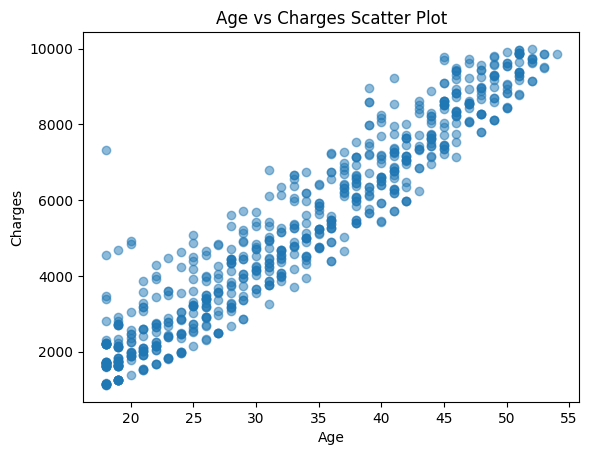

迴歸係數 (slope): 235.39205508240352
截距 (intercept): -2582.1955098700982


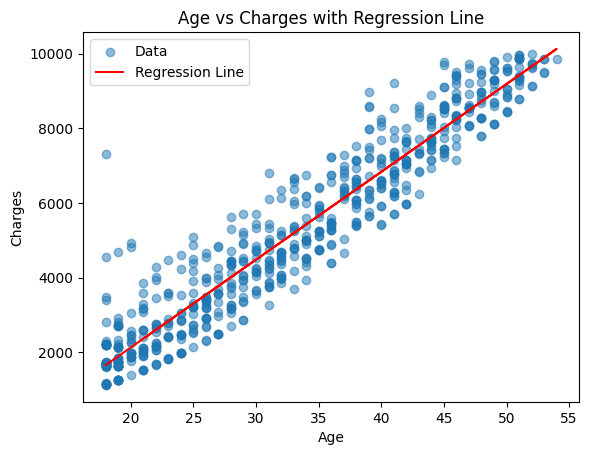

In [4]:
# 繪製散佈圖
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges Scatter Plot')
plt.show()

# 線性迴歸
model = LinearRegression()
model.fit(X, y)

# 輸出係數與截距
print(f'迴歸係數 (slope): {model.coef_[0]}')
print(f'截距 (intercept): {model.intercept_}')

# 繪製迴歸線
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Regression Line')
plt.legend()
plt.show()